In [1]:
import numpy as np
import os
from xml.etree import ElementTree
import cv2

In [2]:
import matplotlib.pyplot as plt

import time 

from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
%matplotlib inline

In [4]:
targetDir = os.path.join("../VOCdevkit","myVOC")

filename = os.path.join(targetDir , "Annotations")
img_dir = os.path.join(targetDir , "JPEGImages" )
cut_image = os.path.join(targetDir , "cut_images")

In [22]:
targetDir_b = os.path.join("../VOCdevkit","Bills_output")

filename_b = os.path.join(targetDir_b , "Annotations")
img_dir_b = os.path.join(targetDir_b , "JPEGImages" )
cut_image_b = os.path.join(targetDir_b , "cut_images")

In [5]:
filenames = os.listdir(cut_image)
test_file = filenames[0]
print(test_file)

image18-08-08_18-14-22-86_0.jpg


In [24]:
filenames = os.listdir(cut_image_b)
test_file_b = filenames[0]
print(test_file_b)

image18-07-25_10-18-24-61_0.jpg


In [25]:
imagefile = os.path.join(cut_image,test_file)
im = cv2.imread(imagefile)

imagefile_b = os.path.join(cut_image_b,test_file_b)
im_bill = cv2.imread(imagefile_b)



In [9]:
bgr2rgb_ops = lambda im: cv2.cvtColor(im , cv2.COLOR_BGR2RGB)
gray_ops = lambda im: cv2.cvtColor(im , cv2.COLOR_RGB2GRAY)
YCrCb_ops = lambda im : cv2.cvtColor(im, cv2.COLOR_RGB2YCrCb)

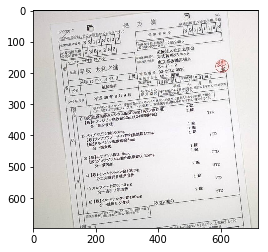

In [11]:
im_pre = bgr2rgb_ops(im)
plt.imshow( im_pre  )

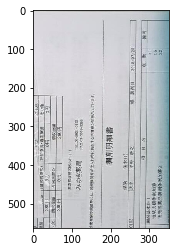

In [26]:
im_bill_rgb = bgr2rgb_ops(im_bill)
plt.imshow( im_bill_rgb  )

In [39]:
# Setup Parameters
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9  # HOG orientations
pix_per_cell = 4 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
spatial_size = (32, 32) # Spatial binning dimensions
hist_bins = 32    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off


In [40]:
gray_im = gray_ops(im_pre)
ycr_im = YCrCb_ops(im_pre)

gray_im_bill = gray_ops(im_bill_rgb)
ycr_im_bill = YCrCb_ops(im_bill_rgb)


In [41]:
hog_ops = lambda im:get_hog_features(im, orient, 
                        pix_per_cell, cell_per_block, vis=True, feature_vec=True)


In [42]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell), cells_per_block=(cell_per_block, cell_per_block), visualise=vis, feature_vector=feature_vec)
        return features


In [43]:
hog_im = hog_ops(gray_im) 
hog_im_bill = hog_ops(gray_im_bill) 



/Users/donchan/anaconda3/envs/tensorflow35/lib/python3.5/site-packages/skimage/feature/_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [ ]:
def bin_spatial(img, color_space='RGB', size=(32, 32)):
    
    ## convert image to new color space (if specified)
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(img)             
    
    ## use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(feature_image, size).ravel() 
    
    return features


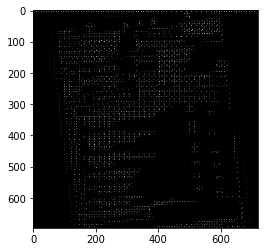

In [21]:
plt.imshow( hog_im[1] ,cmap="gray")

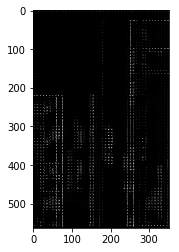

In [29]:
plt.imshow( hog_im_bill[1] ,cmap="gray")

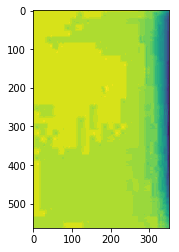

In [38]:
plt.imshow(ycr_im_bill[:,:,1])

In [44]:
hog_im[1].shape

(696, 719)